### Plot nowcast-green monthly mean, std, min and max surface nitrate for the northern strait
### for comparison with test run, make a version that only shows may-sep

Episodic nitrate supply to the surface waters of the northwestern Strait of Georgia; evident as a region of elevated mean (March-November) and standard deviation (April-September) of surface nitrate stretching from Discovery Passage to Baynes Sound in a monthly climatology based on simulations from fall 2014 to present.

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import os
import glob
import datetime as dt
from salishsea_tools import viz_tools
from matplotlib.ticker import FormatStrFormatter
import cmocean
from salishsea_tools import viz_tools, evaltools as et
import matplotlib.gridspec as gridspec
import pickle
import matplotlib as mpl
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
%matplotlib inline

In [2]:
saveloc='/ocean/eolson/MEOPAR/analysis-elise/notebooks/NorthernNitrate/save/'
#saveloc='/data/eolson/MEOPAR/biomodelevalpaper/figsNNut/'

In [3]:
i0=115
i1=215
j0=580
j1=810
k=0

In [4]:
fmesh=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')
lat=fmesh.variables['nav_lat'][j0:j1,i0:i1]
lon=fmesh.variables['nav_lon'][j0:j1,i0:i1]
tmask=fmesh.variables['tmask'][0,k,j0:j1,i0:i1]
#gdept_0,e3t_0
fmesh.close()

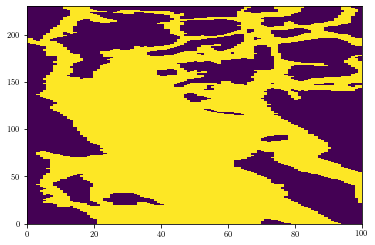

In [5]:
plt.pcolormesh(tmask)

In [6]:
mon={5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep'}

In [7]:
tlen=int((dt.datetime(2015,9,27)-dt.datetime(2015,5,1)).total_seconds()/(24*3600))
tlist=np.array([dt.datetime(2015,5,1)+dt.timedelta(days=ii) for ii in range(0,tlen+1)])
tlist[-1]

datetime.datetime(2015, 9, 27, 0, 0)

In [8]:
mm=np.array([ii.month for ii in tlist])
mm[0]

5

In [9]:
sourcedir='/data/eolson/results/MEOPAR/SS36runs/linkHC201812/'

In [11]:
recalc=True
if recalc:
    ffmt='%Y%m%d'
    dfmt='%d%b%y'
    stencil='{0}/SalishSea_1h_{1}_{1}_ptrc_T.nc'
    flist=dict()
    for imon in range(5,10):
        flist[imon]=list()
        for idt in tlist[mm==imon]:
            try:
                iifstr=glob.glob(sourcedir+stencil.format(idt.strftime(dfmt).lower(),idt.strftime(ffmt),idt.strftime(ffmt)),recursive=True)[0]
            except:
                print('file does not exist:  '+sourcedir+stencil.format(idt.strftime(dfmt).lower(),idt.strftime(ffmt),idt.strftime(ffmt)))
                raise
            flist[imon].append(iifstr)

    means=dict()
    stds=dict()
    for imon in range(5,10):
        N=np.zeros((len(flist[imon])*24,j1-j0,i1-i0))
        for iif in range(0,len(flist[imon])):
            with nc.Dataset(flist[imon][iif]) as fi:
                N[(iif*24):(iif*24+24),:,:]=fi.variables['nitrate'][:,k,j0:j1,i0:i1]
        means[imon]=np.mean(N,0)
        stds[imon]=np.std(N,0)

    with open(saveloc+'monthlySurfaceMeansMaySepBase.pkl', 'wb') as output:
        pickle.dump(means, output)
    with open(saveloc+'monthlySurfaceStdsMaySepBase.pkl', 'wb') as output:
        pickle.dump(stds, output)
else:
    with open(saveloc+'monthlySurfaceMeansMaySepBase.pkl', 'rb') as output:
        means=pickle.load(output)
    with open(saveloc+'monthlySurfaceStdsMaySepBase.pkl', 'rb') as output:
        stds=pickle.load(output)

In [12]:
cm1=plt.get_cmap('Purples')
cm1.set_bad('wheat')
cm2=plt.get_cmap('Greens')
cm2.set_bad('wheat')

[Text(1, 0, ''),
 Text(1, 0, ''),
 Text(1, 0, ''),
 Text(1, 0, ''),
 Text(1, 0, ''),
 Text(1, 0, '$\\geq$ ')]

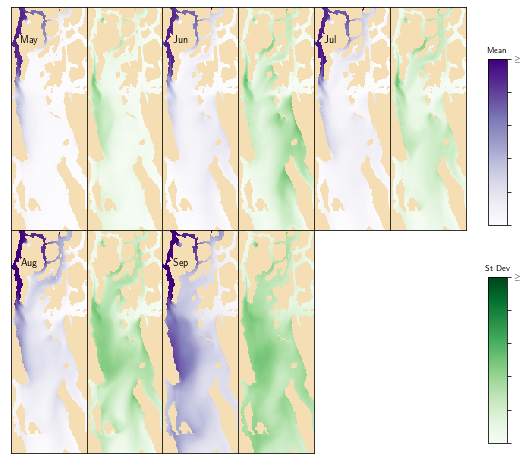

In [21]:
fig=plt.figure(figsize=(7.4,6.6))
gs0=gridspec.GridSpec(2,4,hspace=0,wspace=0,bottom=.03,left=.01,top=.97,right=.95,width_ratios=[1,1,1,.3])
ii=4
for jx in range(0,2):
    for ix in range(0,3):
        if ii<9:
            gsi=gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[jx,ix],width_ratios=[1,1],wspace=0)
            ax1=fig.add_subplot(gsi[0])
            ax2=fig.add_subplot(gsi[1])
            axi=[ax1,ax2,]
            p0=axi[0].pcolormesh(np.ma.masked_where(tmask==0,means[ii+1]),cmap=cm1,vmin=0,vmax=20)
            #axi[0].set_title(mon[ii+1]+' Mean Nitrate ($\mu$M N)')
            axi[0].get_xaxis().set_visible(False)
            axi[0].get_yaxis().set_visible(False)
            axi[0].set_ylim(0,230)
            axi[0].text(13.5,193,mon[ii+1])
            p1=axi[1].pcolormesh(np.ma.masked_where(tmask==0,stds[ii+1]),cmap=cm2,vmin=0,vmax=15)
            #fig.colorbar(p0,ax=axi[1])
            #axi[1].set_title(mon[ii+1]+' St Dev Nitrate ($\mu$M N)')
            axi[1].get_xaxis().set_visible(False)
            axi[1].get_yaxis().set_visible(False)
            axi[1].set_ylim(0,230)
            #ax[ii].suptitle(mon[ii+1])
            ii=ii+1
gscb=gridspec.GridSpecFromSubplotSpec(5,3,subplot_spec=gs0[:,3],hspace=0,wspace=0,width_ratios=[.9,.8,.2],
                                     height_ratios=[.25,.8,.25,.8,.05])
axcb0=fig.add_subplot(gscb[1,1])
axcb1=fig.add_subplot(gscb[3,1])
axcb0.set_title('Mean')
axcb1.set_title('St Dev')
cb0=fig.colorbar(p0,cax=axcb0,ticks=np.linspace(0,20,6))
test=cb0.ax.yaxis.get_ticklabels()
#test[0].set_text(u'\u2264{}'.format(test[0].get_text()))
#test[-1].set_text(u'\u2265{}'.format(test[-1].get_text()))
test[-1].set_text('$\geq$ {}'.format(test[-1].get_text()))
cb0.ax.yaxis.set_ticklabels(test)
cb1=fig.colorbar(p1,cax=axcb1,ticks=np.linspace(0,15,6))
test=cb1.ax.yaxis.get_ticklabels()
#test[0].set_text(u'\u2264{}'.format(test[0].get_text()))
#test[-1].set_text(u'\u2265{}'.format(test[-1].get_text()))
test[-1].set_text('$\geq$ {}'.format(test[-1].get_text()))
cb1.ax.yaxis.set_ticklabels(test)
##fig.savefig(saveloc+'surfaceMeanStd.png',dpi=200)
##fig.savefig(saveloc+'surfaceMeanStd.eps',dpi=200)